In [1]:
from urllib.request import urlretrieve
import os
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
URL = "https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD"
def get_fremont_data(filename = "fremont.csv", url = URL):
    if not os.path.exists(filename):
        urlretrieve(URL, filename)
    data  = pd.read_csv(filename, index_col = "Date", parse_dates = True)
    data.columns = ['Total', 'West', 'East'] # rename columns
    return data

In [ ]:
data = get_fremont_data()

In [4]:
!head fremont.csv

Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
10/03/2012 12:00:00 AM,13,4,9
10/03/2012 01:00:00 AM,10,4,6
10/03/2012 02:00:00 AM,2,1,1
10/03/2012 03:00:00 AM,5,2,3
10/03/2012 04:00:00 AM,7,6,1
10/03/2012 05:00:00 AM,31,21,10
10/03/2012 06:00:00 AM,155,105,50
10/03/2012 07:00:00 AM,352,257,95
10/03/2012 08:00:00 AM,437,291,146


In [7]:
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2022-08-01 00:00:00,23.0,7.0,16.0
2022-08-01 01:00:00,12.0,5.0,7.0
2022-08-01 02:00:00,3.0,0.0,3.0
2022-08-01 03:00:00,5.0,2.0,3.0
2022-08-01 04:00:00,10.0,2.0,8.0


<AxesSubplot: xlabel='Date'>

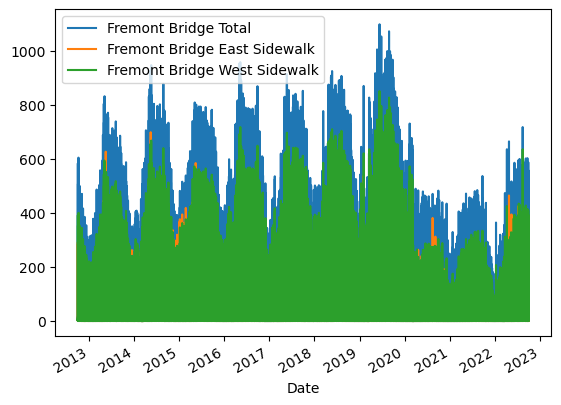

In [8]:
%matplotlib inline
data.plot()

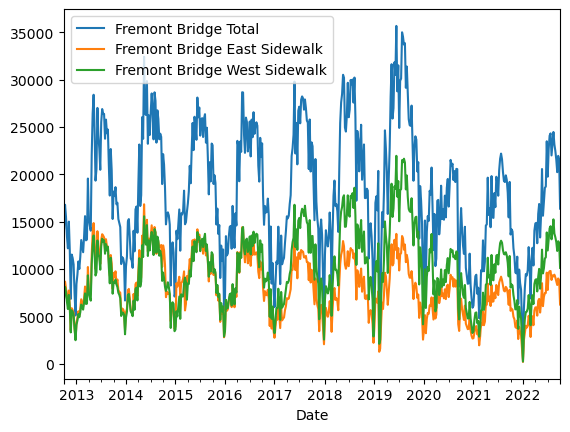

In [9]:
# resample the data with weekly freq taking the sum and plotting

data.resample("W").sum().plot();

/tmp/ipykernel_17829/3186286060.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


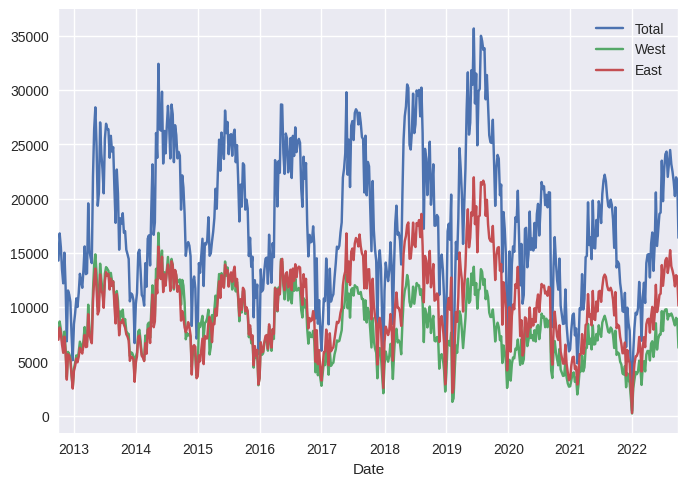

In [10]:
# change style of plots

data.columns = ['Total', 'West', 'East'] # rename columns
plt.style.use('seaborn')
data.resample("W").sum().plot();

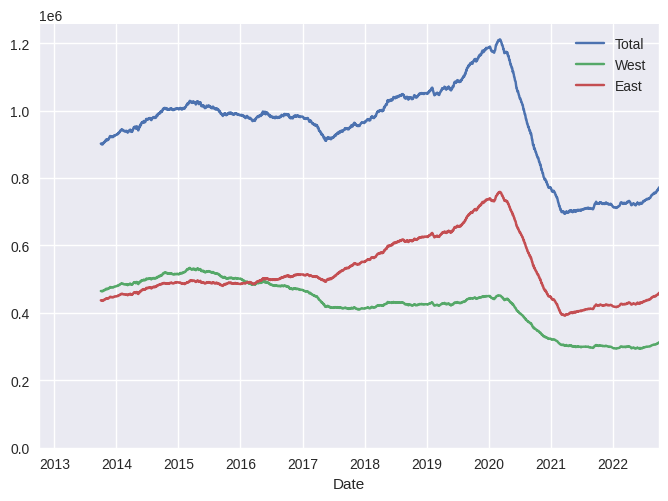

In [11]:
# see trend by rolling annual mean
ax = data.resample("D").sum().rolling(365).sum().plot();
ax.set_ylim(0, None);


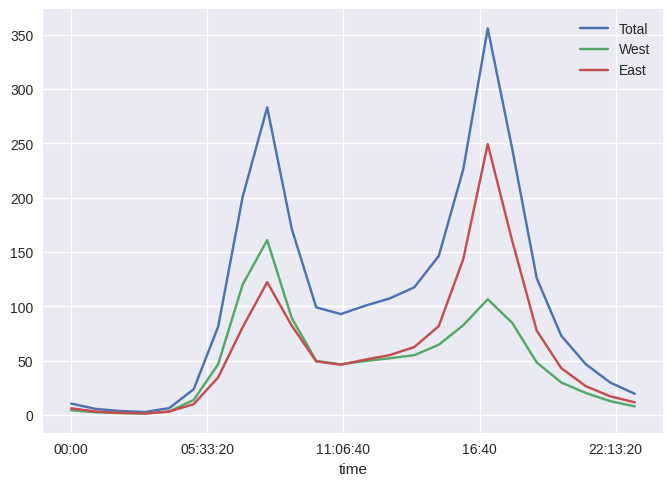

In [12]:
# plot the time variation by hour of day
# group by the time component of the index of the data
# calculate mean for each column and plot

data.groupby(data.index.time).mean().plot();

In [13]:
# pivot wider with rows as time of day and columns as date
pivoted = data.pivot_table('Total', index = data.index.time, columns = data.index.date)
# sample the first five rows and cols
pivoted.iloc[:5, :5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


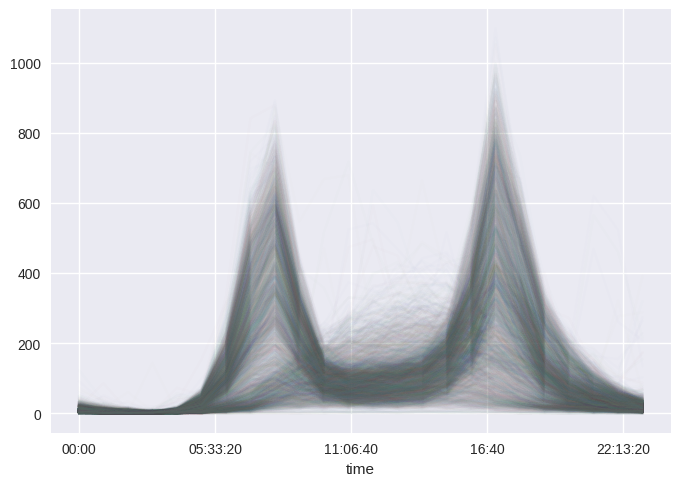

In [14]:
pivoted.plot(legend=False, alpha = 0.01);
# bimodal peaks could be weekdays (commute)
# other monomodal signal weekends

In [15]:
#  https://www.youtube.com/watch?v=J45NJ0pJXWQ&list=PLYCpMb24GpOC704uO9svUrihl-HY1tTJJ&index=3

### Now create github repo, clone, stage commit and push

In [16]:
# github repo https://github.com/stevecrawshaw/jupyter-workflow
# next steps in terminal
# git clone https://github.com/stevecrawshaw/jupyter-workflow.git
# cloning creates new folder, so move NB into that
# (base) steve@dell-ubuntu:~/r-projects/reproducible_python$ mv rep_python_1.ipynb jupyter-workflow/
# (base) steve@dell-ubuntu:~/r-projects/reproducible_python$ cd jupyter-workflow/

# check status - OK
# (base) steve@dell-ubuntu:~/r-projects/reproducible_python/jupyter-workflow$ git status

#stage
# (ds01) steve@dell-ubuntu:~/r-projects/reproducible_python/jupyter-workflow$ git add rep_python_1.ipynb 
# commit
# (ds01) steve@dell-ubuntu:~/r-projects/reproducible_python/jupyter-workflow$ git commit -m "initial commit"
# [main dc5e978] initial commit
# push to main 
# (ds01) steve@dell-ubuntu:~/r-projects/reproducible_python/jupyter-workflow$ git push origin main
# modity gitignore to ignore fremont.csv - stage, commit